In [ ]:
from google.colab import files


uploaded = files.upload()

Saving HR_comma_sep.csv to HR_comma_sep.csv


The dataset is from Kaggle : https://www.kaggle.com/datasets/giripujar/hr-**analytics**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['HR_comma_sep.csv']))
print(df)


       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df['left'].describe()

count    14999.000000
mean         0.238083
std          0.425924
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: left, dtype: float64

In [ ]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [ ]:
missing_data=df.isnull()
missing_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

satisfaction_level
False    14999
Name: satisfaction_level, dtype: int64

last_evaluation
False    14999
Name: last_evaluation, dtype: int64

number_project
False    14999
Name: number_project, dtype: int64

average_montly_hours
False    14999
Name: average_montly_hours, dtype: int64

time_spend_company
False    14999
Name: time_spend_company, dtype: int64

Work_accident
False    14999
Name: Work_accident, dtype: int64

left
False    14999
Name: left, dtype: int64

promotion_last_5years
False    14999
Name: promotion_last_5years, dtype: int64

Department
False    14999
Name: Department, dtype: int64

salary
False    14999
Name: salary, dtype: int64



# Data Visualisation

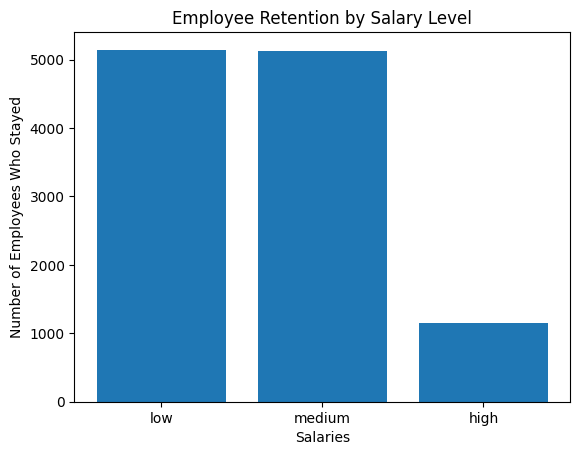

In [ ]:
df_stayed = df[df['left'] == 0]

# Create a bar plot showing the number of employees who stayed at different salary levels
plt.bar(df_stayed['salary'].value_counts().index, df_stayed['salary'].value_counts().values)

plt.xlabel("Salaries")
plt.ylabel("Number of Employees Who Stayed")
plt.title("Employee Retention by Salary Level")  # Optional title for clarity
plt.show()

In [ ]:
df_stayed["salary"][df['salary']=='low'].count()

5144

In [ ]:
# Filter data by salary range (assuming 'salary' is a numerical column)
salary_ranges = ["low", "medium", "high"]
salary_bins = pd.cut(df['salary'], len(salary_ranges), labels=salary_ranges)  # Use pd.cut for binning

low       2172
medium    1317
high        82
Name: salary, dtype: int64
low       5144
medium    5129
high      1155
Name: salary, dtype: int64


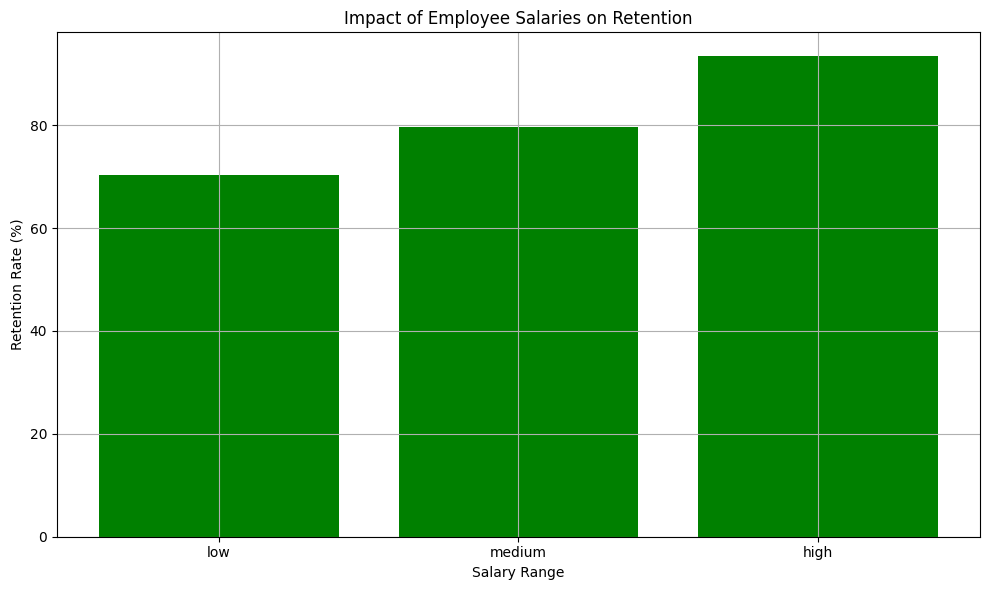

In [ ]:
# Filter data by salary range (assuming 'salary' is a numerical column)
salary_ranges = ["low", "medium", "high"]
salary_bins = pd.cut(df['salary'], len(salary_ranges), labels=salary_ranges)  # Use pd.cut for binning

# Count employees left and stayed by salary range
employees_left = salary_bins.value_counts()[salary_ranges] - df_stayed['salary'].value_counts()[salary_ranges]
employees_stayed = df_stayed['salary'].value_counts()[salary_ranges]

print(employees_left)
print(employees_stayed)

# Calculate retention rates (handle potential division by zero)
retention_rates = [(stayed / (left + stayed)) * 100 for left, stayed in zip(employees_left, employees_stayed) if left + stayed > 0]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(salary_ranges, retention_rates, color='green')
plt.xlabel('Salary Range')
plt.ylabel('Retention Rate (%)')
plt.title('Impact of Employee Salaries on Retention')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df["Department"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

Creating a function for getting the employee details according to Departments

In [ ]:
import pandas as pd

def get_employee_retention_by_department(df, departments):

  # Filter data by department
  department_data = {}
  for department in departments:
    department_df = df[df['Department'] == department]
    total_employees = len(department_df)
    employees_left = department_df['left'].sum()
    department_data[department] = {'total_employees': total_employees, 'employees_left': employees_left}

  return department_data

# Example usage (replace 'df' with your actual DataFrame)
departments = ['sales', 'accounting', 'hr', 'technical', 'support', 'management']
department_retention_data = get_employee_retention_by_department(df, departments)

# Access data for a specific department (e.g., sales)
sales_data = department_retention_data['sales']
print(f"Sales Department:")
print(f"Total Employees: {sales_data['total_employees']}")
print(f"Employees Left: {sales_data['employees_left']}")

Sales Department:
Total Employees: 4140
Employees Left: 1014


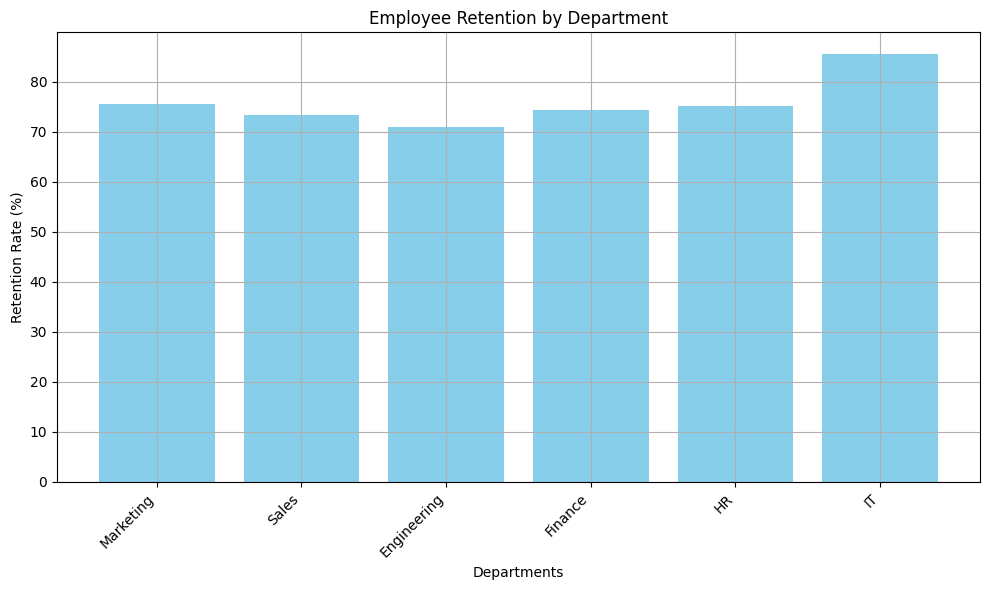

In [ ]:
import matplotlib.pyplot as plt

# Department data (replace with your data)
total_employees = [department_retention_data['sales']['total_employees'], department_retention_data['accounting']['total_employees'],department_retention_data['hr']['total_employees'], department_retention_data['technical']['total_employees'], department_retention_data['support']['total_employees'], department_retention_data['management']['total_employees']]
employees_left = [department_retention_data['sales']['employees_left'], department_retention_data['accounting']['employees_left'],department_retention_data['hr']['employees_left'], department_retention_data['technical']['employees_left'], department_retention_data['support']['employees_left'], department_retention_data['management']['employees_left']]

# Calculate retention rates
retention_rates = [(total - left) / total * 100 for total, left in zip(total_employees, employees_left)]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(departments, retention_rates, color='skyblue')
plt.xlabel('Departments')
plt.ylabel('Retention Rate (%)')
plt.title('Employee Retention by Department')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df['salary'].replace({"low":0,"medium":0.5,"high":1},inplace=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0.0
1,0.80,0.86,5,262,6,0,1,0,sales,0.5
2,0.11,0.88,7,272,4,0,1,0,sales,0.5
3,0.72,0.87,5,223,5,0,1,0,sales,0.0
4,0.37,0.52,2,159,3,0,1,0,sales,0.0


In [ ]:
new_data=df.drop(['Department'],axis=1)
new_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,0.0
1,0.80,0.86,5,262,6,0,1,0,0.5
2,0.11,0.88,7,272,4,0,1,0,0.5
3,0.72,0.87,5,223,5,0,1,0,0.0
4,0.37,0.52,2,159,3,0,1,0,0.0


Doing one-hot encoding

In [ ]:
new_department=pd.get_dummies(df['Department'])
new_department.replace({True: 1, False: 0}, inplace=True)
new_department.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [ ]:
final_data=pd.concat([df,new_department],axis=1)
final_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,0.0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,0.5,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,0.5,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,0.0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,0.0,0,0,0,0,0,0,0,1,0,0


In [ ]:
xdata=final_data.drop(['left','Department'],axis=1)
ydata=final_data['left']
ydata.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(xdata,ydata,test_size=0.2,random_state=20)

In [ ]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
sc=model.score(xtest,ytest)
print(sc)

0.8053333333333333
